In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load the datasets 
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Peek at the data
print("Ratings Data:")
print(ratings.head())
print("\nMovies Data:")
print(movies.head())

# Check for missing values
print(ratings.isnull().sum())
print(movies.isnull().sum())

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


In [5]:
# Merge ratings and movies on 'movieId'
data = pd.merge(ratings, movies, on='movieId')

# Drop 'timestamp' (not needed for now)
data = data.drop('timestamp', axis=1)

# Look at the merged data
print(data.head())

   userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


Top 5 Highest-Rated Movies:
title
Karlson Returns (1970)                                                         5.0
Zeitgeist: Moving Forward (2011)                                               5.0
Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)    5.0
Dragons: Gift of the Night Fury (2011)                                         5.0
12 Angry Men (1997)                                                            5.0
Name: rating, dtype: float64


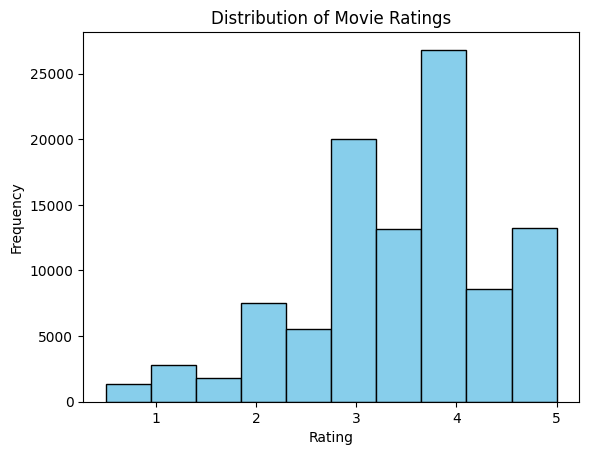

In [6]:
# Average rating per movie
avg_ratings = data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("Top 5 Highest-Rated Movies:")
print(avg_ratings.head())

# Plot average ratings distribution
plt.hist(data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

In [7]:
# Simple feature: average rating per user and per movie
user_avg = data.groupby('userId')['rating'].mean().reset_index().rename(columns={'rating': 'user_avg_rating'})
movie_avg = data.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating': 'movie_avg_rating'})

# Add these features to the main data
data = pd.merge(data, user_avg, on='userId')
data = pd.merge(data, movie_avg, on='movieId')

# Features (inputs) and target (output)
X = data[['user_avg_rating', 'movie_avg_rating']]  # Simple features for beginners
y = data['rating']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings
y_pred = model.predict(X_test)

Mean Squared Error: 0.66


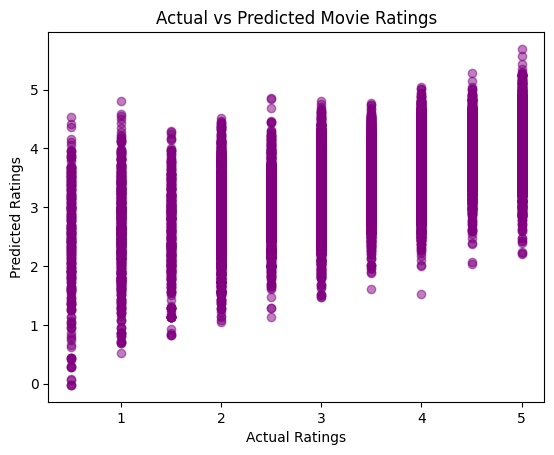

In [10]:
# Calculate error (lower is better)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Plot actual vs predicted ratings
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()